In [1]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import simple_norm

In [2]:
idx = 2  # index of the observation to download

In [26]:
scan = os.scandir('data/cadc2/')
files = [entry.path for entry in scan if entry.is_file()]
files.sort()

comet_name = "_".join(files[idx].split('/')[-1].split('.')[0].split('_')[:-1])
print(f'Processing comet: {comet_name}')
df_cadc = pd.read_csv(files[idx])
df_jplh = pd.read_csv(f'data/jpl2/{comet_name}_jplhorizons.csv')
df_merged = pd.merge(df_cadc, df_jplh, left_index=True, right_index=True, suffixes=('_cadc', '_jplh'))

# Select observations with DECam
df_decam = df_merged[df_merged['Telescope/Instrument'] == 'CTIO-4m/DECam']
df_decam

Processing comet: C_2005 T3


,Image,MJD,Filter,Exptime,Object_RA,Object_Dec,Image_target,Telescope/Instrument,MetaData,Datalink,...,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
204,dec065029.fits.fz 4b051f5a04ba287e08ef1f0cd27e...,56382.167005,z,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11575727.30,0.214723,8737.28,31755.23,77.224940,196.3285,NaN,2.4140,232.4198,-2.3519
205,tu1705735.fits.fz e8ed9e0b81afffad907bb79d2eb8...,56382.167005,unknown,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11620000.20,0.214771,8677.23,31536.98,77.520297,196.3632,NaN,2.5055,232.5003,-2.3560
206,c4d_130331_035939_ooi_z_v1.fits.fz f089ebca947...,56382.167005,z,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11663974.00,0.214818,8615.10,31311.20,77.813658,196.3979,NaN,2.5966,232.5805,-2.3601
207,c4d_130331_035939_opi_z_v1.fits.fz 198f84ae3ae...,56382.167005,z,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11707637.20,0.214864,8550.89,31077.82,78.104948,196.4326,NaN,2.6871,232.6604,-2.3643
208,c4d_130331_035939_ooi_z_ls11.fits.fz 1a75fc39a...,56382.167005,z,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11750978.50,0.214909,8484.59,30836.86,78.394090,196.4674,NaN,2.7771,232.7401,-2.3685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,c4d_250528_101650_ori.fits.fz ea91c87fde969207...,60823.428655,r,50,11.828088,2.610616,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7748889.71,0.126279,4174.99,15173.81,51.695028,260.5465,NaN,3.4168,298.2969,-6.7030
1867,c4d_250528_101650_oki_r_v1.fits.fz ad1b0c5f8ce...,60823.428655,r,50,11.828088,2.610616,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7727029.05,0.126072,4206.04,15286.67,51.549189,260.5931,NaN,3.2965,298.2806,-6.7066
1868,c4d_250528_101650_ooi_r_v1.fits.fz 1d4258ac0c3...,60823.428655,r,50,11.828088,2.610616,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7705024.54,0.125862,4235.87,15395.07,51.402391,260.6396,NaN,3.1755,298.2637,-6.7101
1869,c4d_250528_101650_opi_r_v1.fits.fz e39f78a7478...,60823.428655,r,50,11.828088,2.610616,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7682882.53,0.125651,4264.47,15499.01,51.254675,260.6862,NaN,3.0538,298.2463,-6.7135


In [28]:
# df_decam['date'] = df_decam['Image'].apply(lambda x: "_".join(x.split('_')[:3]))

# gr = df_decam.groupby('date')

# for i, (name, group) in enumerate(gr):
#     display(group)
#     cond = group['Image'].str.contains('_ooi')
#     group_filtered = group[cond]
#     if len(group_filtered) > 1:
#         if group_filtered['Image'].str.contains('_v2').any():
#             display(group_filtered[group_filtered['Image'].str.contains('_v2')])
#         elif group_filtered['Image'].str.contains('_v1').any():
#             display(group_filtered[group_filtered['Image'].str.contains('_v1')])
#         elif group_filtered['Image'].str.contains('_v3').any():
#             display(group_filtered[group_filtered['Image'].str.contains('_v3')])
#         elif group_filtered['Image'].str.contains('_v4').any():
#             display(group_filtered[group_filtered['Image'].str.contains('_v4')])
#         else:
#             display(group_filtered.iloc[[0]])
#     else:
#         display(group_filtered)

#     if i == 10:
#         break


In [34]:
def select_decam_images(group):
    # Select only calibrated images containing '_ooi'
    cond = group['Image'].str.contains('_ooi') | group['Image'].str.contains('_opi')
    group_filtered = group[cond]
    # If both _opi and _ooi exist, prefer _opi
    if group_filtered['Image'].str.contains('_opi').any():
        group_filtered = group_filtered[group_filtered['Image'].str.contains('_opi')]
    if len(group_filtered) > 1:
        if group_filtered['Image'].str.contains('_v4').any():
            return group_filtered[group_filtered['Image'].str.contains('_v4')]
        elif group_filtered['Image'].str.contains('_v3').any():
            return group_filtered[group_filtered['Image'].str.contains('_v3')]
        elif group_filtered['Image'].str.contains('_v2').any():
            return group_filtered[group_filtered['Image'].str.contains('_v2')]
        elif group_filtered['Image'].str.contains('_v1').any():
            return group_filtered[group_filtered['Image'].str.contains('_v1')]
        else:
            return group_filtered.iloc[[0]]
    else:
        return group_filtered

cond = df_decam['Image'].str.startswith('c4d_')
df_decam = df_decam[cond].reset_index(drop=True)

# Recompute grouping key
df_decam['date'] = df_decam['Image'].apply(lambda x: "_".join(x.split('_')[:3]))
gr = df_decam.groupby('date')

# Silence DeprecationWarning by excluding grouping columns from the groups
try:
    df_selected = gr.apply(select_decam_images, include_groups=False)
except TypeError:
    # Fallback for older pandas without include_groups parameter
    df_selected = gr.apply(select_decam_images)

df_selected

,,Image,MJD,Filter,Exptime,Object_RA,Object_Dec,Image_target,Telescope/Instrument,MetaData,Datalink,...,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
date,,,,,,,,,,,,,,,,,,,,,,
c4d_130331_035939,1,c4d_130331_035939_opi_z_v1.fits.fz 198f84ae3ae...,56382.167005,z,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11707637.20,0.214864,8550.89,31077.82,78.104948,196.4326,NaN,2.6871,232.6604,-2.3643
c4d_130331_040147,4,c4d_130331_040147_opi_z_v1.fits.fz 89e4d7bfddf...,56382.168488,z,100,176.552151,5.521737,17560571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11920903.10,0.215077,8199.36,29800.18,79.527705,196.6063,NaN,3.1312,233.0557,-2.3855
c4d_130401_050330,7,c4d_130401_050330_opi_z_v1.fits.fz a2f7a3421a7...,56383.211351,z,100,176.467855,5.551133,17640500.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,12124798.40,0.215261,7802.62,28358.27,80.887948,196.7800,NaN,3.5587,233.4426,-2.4076
c4d_130403_051438,10,c4d_130403_051438_opi_z_v1.fits.fz 7c221762d0e...,56385.219077,z,100,176.307586,5.606397,17560571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,12318166.30,0.215417,7365.92,26771.09,82.177960,196.9537,NaN,3.9673,233.8199,-2.4304
c4d_140416_041445,13,c4d_140416_041445_ooi_r_a1.fits.fz 7948e1bfaaf...,56763.176136,r,30,188.495494,-1.341289,PMap20140415-O9,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,10384629.00,0.203251,11028.68,40083.24,69.278787,201.8970,NaN,0.4250,236.8377,-3.2086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c4d_250107_010035,1016,c4d_250107_010035_opi_r_v1.fits.fz d091b75c1f8...,60682.042277,r,35,349.870923,-7.766219,twilight3,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,8092840.99,0.129480,3486.73,12672.37,53.989624,259.7565,NaN,5.2805,298.4623,-6.6222
c4d_250528_094005,1020,c4d_250528_094005_opi_r_v1.fits.fz 4cca63a6c37...,60823.403128,r,50,11.824766,2.609162,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7997782.89,0.128606,3715.03,13502.09,53.355464,259.9886,NaN,4.7756,298.4378,-6.6493
c4d_250528_095220,1025,c4d_250528_095220_opi_r_v1.fits.fz 5d7955ab699...,60823.411637,r,50,11.825873,2.609646,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7897360.34,0.127675,3924.43,14263.16,52.685517,260.2209,NaN,4.2317,298.3922,-6.6738


In [30]:
df_limits = pd.read_csv("data/Survey-Filter-LimitingMagnitude-SaturationMagnitude-TypicalExposureTime.csv")
df_limits

,Telescope/Instrument,Filter,Limiting,Saturation,Exposure
0,Pan-STARRS1,g,21.5,14.5,45
1,Pan-STARRS1,r,21.5,14.5,45
2,Pan-STARRS1,i,21.5,14.5,45
3,Pan-STARRS1,z,20.9,14.5,45
4,Pan-STARRS1,y,19.7,14.5,45
5,SDSS,g,23.3,14.0,54
6,SDSS,u,22.3,14.0,54
7,SDSS,r,23.1,14.0,54
8,SDSS,i,22.3,14.0,54
9,SDSS,z,20.8,14.0,54


In [35]:
# Keep only needed columns
limits = df_limits[[c for c in ['Telescope/Instrument', 'Filter', 'Limiting', 'Saturation'] if c in df_limits.columns]].dropna(subset=['Telescope/Instrument'])

# Keep only observations whose Telescope/Instrument exists in the limits
valid_instr = set(limits['Telescope/Instrument'].unique())
df_merged = df_selected[df_selected['Telescope/Instrument'].isin(valid_instr)].copy()

# Attach limits to each observation; inner keeps only matched (Instrument, Filter)
df_with_limits = df_merged.merge(limits, on=['Telescope/Instrument', 'Filter'], how='inner')

# Condition: not saturated (Tmag >= Saturation) and not too faint (Tmag <= Limiting)
cond = (df_with_limits['Tmag'] >= df_with_limits['Saturation']) & (df_with_limits['Tmag'] <= df_with_limits['Limiting'])

df_visible = df_with_limits[cond]
df_visible

,Image,MJD,Filter,Exptime,Object_RA,Object_Dec,Image_target,Telescope/Instrument,MetaData,Datalink,...,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat,Limiting,Saturation
0,c4d_130331_035939_opi_z_v1.fits.fz 198f84ae3ae...,56382.167005,z,100,176.552271,5.521695,17740571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,8550.89,31077.82,78.104948,196.4326,NaN,2.6871,232.6604,-2.3643,23.7,16.0
1,c4d_130331_040147_opi_z_v1.fits.fz 89e4d7bfddf...,56382.168488,z,100,176.552151,5.521737,17560571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,8199.36,29800.18,79.527705,196.6063,NaN,3.1312,233.0557,-2.3855,23.7,16.0
2,c4d_130401_050330_opi_z_v1.fits.fz a2f7a3421a7...,56383.211351,z,100,176.467855,5.551133,17640500.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7802.62,28358.27,80.887948,196.7800,NaN,3.5587,233.4426,-2.4076,23.7,16.0
3,c4d_130403_051438_opi_z_v1.fits.fz 7c221762d0e...,56385.219077,z,100,176.307586,5.606397,17560571.0,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,7365.92,26771.09,82.177960,196.9537,NaN,3.9673,233.8199,-2.4304,23.7,16.0
4,c4d_140416_041445_ooi_r_a1.fits.fz 7948e1bfaaf...,56763.176136,r,30,188.495494,-1.341289,PMap20140415-O9,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,11028.68,40083.24,69.278787,201.8970,NaN,0.4250,236.8377,-3.2086,23.7,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,c4d_250107_010035_opi_r_v1.fits.fz d091b75c1f8...,60682.042277,r,35,349.870923,-7.766219,twilight3,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,3486.73,12672.37,53.989624,259.7565,NaN,5.2805,298.4623,-6.6222,23.7,16.0
261,c4d_250528_094005_opi_r_v1.fits.fz 4cca63a6c37...,60823.403128,r,50,11.824766,2.609162,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,3715.03,13502.09,53.355464,259.9886,NaN,4.7756,298.4378,-6.6493,23.7,16.0
262,c4d_250528_095220_opi_r_v1.fits.fz 5d7955ab699...,60823.411637,r,50,11.825873,2.609646,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,3924.43,14263.16,52.685517,260.2209,NaN,4.2317,298.3922,-6.6738,23.7,16.0
263,c4d_250528_100435_opi_r_v1.fits.fz e189d57ba2b...,60823.420146,r,50,11.826981,2.610131,FMa02,CTIO-4m/DECam,https://astroarchive.noirlab.edu/api/retrieve/...,NaN,...,4109.22,14934.79,51.983657,260.4534,NaN,3.6549,298.3275,-6.6953,23.7,16.0


In [24]:
idx = 0
href = df_decam.iloc[idx]['MetaData']

In [ ]:
from astropy.utils.data import conf

# Set cache folder for astropy downloads
conf.dataurl = 'https://astroarchive.noirlab.edu/api/retrieve/'
conf.remote_timeout = 30
hdul = fits.open(href, cache=True, memmap=False)

NameError: name 'href' is not defined

In [15]:
hdul.info()

Filename: /home/asergeiev/.astropy/cache/download/url/271f93f97879d407cacb37861a44ed8f/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     160   ()      
  1  S1            1 CompImageHDU    102   (2160, 4146)   int16   
  2  S2            1 CompImageHDU    102   (2160, 4146)   int16   
  3  S3            1 CompImageHDU    102   (2160, 4146)   int16   
  4  N1            1 CompImageHDU    102   (2160, 4146)   int16   
  5  N2            1 CompImageHDU    102   (2160, 4146)   int16   
  6  N3            1 CompImageHDU    102   (2160, 4146)   int16   
  7  S8            1 CompImageHDU    102   (2160, 4146)   int16   
  8  S9            1 CompImageHDU    102   (2160, 4146)   int16   
  9  S14           1 CompImageHDU    102   (2160, 4146)   int16   
 10  S15           1 CompImageHDU    102   (2160, 4146)   int16   
 11  S20           1 CompImageHDU    102   (2160, 4146)   int16   
 12  S25           1 CompImageHDU    102   (2160, 4146

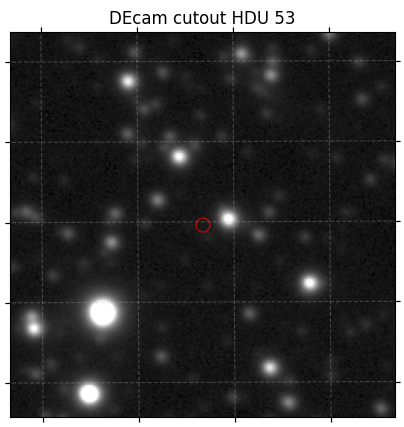

In [ ]:
def cutout_decam(hdul, idx):

    coord = SkyCoord(df_decam.iloc[idx]['Object_RA']*u.deg, df_decam.iloc[idx]['Object_Dec']*u.deg, frame='icrs')
    for i, hdu in enumerate(hdul):
        if i == 0:
            continue
        w = WCS(hdu.header)
        ny, nx = hdu.data.shape
        x_pix, y_pix = w.world_to_pixel(coord)
        in_fov = (0 <= x_pix < nx) and (0 <= y_pix < ny)
        
        if in_fov:
            size = u.Quantity((1, 1), u.arcmin)
            cutout = Cutout2D(hdu.data, (x_pix, y_pix), size, wcs=w)
            
            hdu_out = fits.PrimaryHDU(data=cutout.data, header=cutout.wcs.to_header())
            out_filename = f'./comets/fits/decam_cutout_{idx}_hdu{i}.fits'
            if os.path.exists('./comets/fits/') is False:
                os.makedirs('./comets/fits/')
                
            hdu_out.writeto(out_filename, overwrite=True)
            print(f'Wrote cutout to {out_filename}')    
            
            fig = plt.figure(figsize=(5, 5))
            ax = fig.add_subplot(1, 1, 1, projection=cutout.wcs)
            norm = simple_norm(cutout.data, 'sqrt', percent=99.)
            ax.imshow(cutout.data, origin='lower', cmap='gray', norm=norm,
                    )
            ax.scatter(cutout.wcs.world_to_pixel(coord)[0], cutout.wcs.world_to_pixel(coord)[1],
                    s=100, edgecolor='red', facecolor='none', marker='o', lw=1, alpha=0.7)
            ax.set_title(f'DEcam cutout HDU {i}')
            # WCSAxes niceties
            ax.set_xlabel("RA")
            ax.set_ylabel("Dec")
            ax.coords.grid(True, alpha=0.3, linestyle="--")
            plt.show()
# hdul.close()